### Pandas를 이용한 데이터 불러오기 & 정리

In [1]:
import pandas as pd

In [2]:
CCTV_Seoul = pd.read_csv('CCTV_in_Seoul.csv', encoding = 'utf-8') #인코딩이 안되면 engine = 'python'으로 해보세요!
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [3]:
CCTV_Seoul.rename(columns = {"기관명": "구별"}, 
                                 inplace = True) 
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [4]:
pop_Seoul = pd.read_excel('population_in_Seoul.xls', 
                          header = 2, usecols = 'B, D, G, J, N', encoding = 'utf-8')
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10049607,9765623,283984,1416131
1,종로구,163026,153065,9961,26742
2,중구,135633,125725,9908,22005
3,용산구,245090,228999,16091,37640
4,성동구,316463,308221,8242,42767


In [5]:
pop_Seoul = pop_Seoul.rename(columns={"계":"인구수", "계.1":"한국인", "계.2":"외국인"})

In [6]:
#맨 위의 ‘합계’ 행을 삭제해 보세요! (drop 이용)
pop_Seoul = pop_Seoul.drop([0])

In [7]:
CCTV_Seoul.sort_values(by = '소계', ascending = True).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


In [8]:
CCTV_Seoul.sort_values(by = '소계', ascending = False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


In [9]:
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전'] * 100
CCTV_Seoul.head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252
3,강서구,911,388,258,184,81,134.793814
4,관악구,2109,846,260,390,613,149.290780


In [10]:
CCTV_Seoul.sort_values(by='최근증가율', ascending=False)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765
19,영등포구,1277,495,214,195,373,157.979798
0,강남구,3238,1292,430,584,932,150.619195
4,관악구,2109,846,260,390,613,149.290780
23,중구,1023,413,190,72,348,147.699758
11,동작구,1302,544,341,103,314,139.338235


In [11]:
#CCTV_Seoul 객체와 pop_Seoul 객체를 다음과 같이 통합해 보세요! (merge 함수 이용, 만들어진 객체의 이름은 'data_result'으로)

data_result = CCTV_Seoul.merge(pop_Seoul, left_on='구별', right_on='자치구')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,자치구,인구수,한국인,외국인,65세이상고령자
0,강남구,3238,1292,430,584,932,150.619195,강남구,547453,542364,5089,67085
1,강동구,1010,379,99,155,377,166.490765,강동구,431920,427573,4347,58770
2,강북구,831,369,120,138,204,125.203252,강북구,322915,319164,3751,58196
3,강서구,911,388,258,184,81,134.793814,강서구,603611,596949,6662,79660
4,관악구,2109,846,260,390,613,149.290780,관악구,520040,501957,18083,72249


In [12]:
data_result.drop(columns=['2013년도 이전', '2014년', '2015년', '2016년'])

,구별,소계,최근증가율,자치구,인구수,한국인,외국인,65세이상고령자
0,강남구,3238,150.619195,강남구,547453,542364,5089,67085
1,강동구,1010,166.490765,강동구,431920,427573,4347,58770
2,강북구,831,125.203252,강북구,322915,319164,3751,58196
3,강서구,911,134.793814,강서구,603611,596949,6662,79660
4,관악구,2109,149.290780,관악구,520040,501957,18083,72249
5,광진구,878,53.228621,광진구,371063,355559,15504,45619
6,구로구,1884,64.973730,구로구,438486,404497,33989,61801
7,금천구,1348,100.000000,금천구,254021,233917,20104,35739
8,노원구,1566,188.929889,노원구,548160,543752,4408,77096
9,도봉구,825,246.638655,도봉구,341649,339413,2236,55964


In [13]:
data_result = data_result.set_index('구별')

In [14]:
import numpy as np

In [15]:
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[1.        , 0.22152789],
       [0.22152789, 1.        ]])

In [16]:
np.corrcoef(data_result['한국인'], data_result['소계'])

array([[1.        , 0.21698466],
       [0.21698466, 1.        ]])

In [17]:
data_result.shape

(25, 11)

### Matplotlib을 이용한 시각화

In [18]:
import matplotlib.pyplot as plt #matplotlib가 한글폰트를 지원 안해서 미리 처리해주는 과정
import platform                 #아마 요즘 matplotlib는 이런거 안해도 잘 될수도 있어요!

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': #맥os 사용자
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':#윈도우 사용자
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

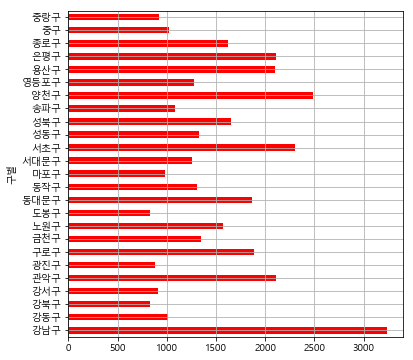

In [19]:
data_result['소계'].plot(kind='barh',grid=True, figsize=(6,6), color="r") #bar는 수직바, barh는 수평바(horizontal)
plt.show()

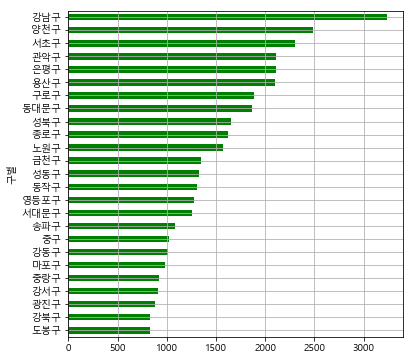

In [20]:
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(6,6), color="g")
plt.show()

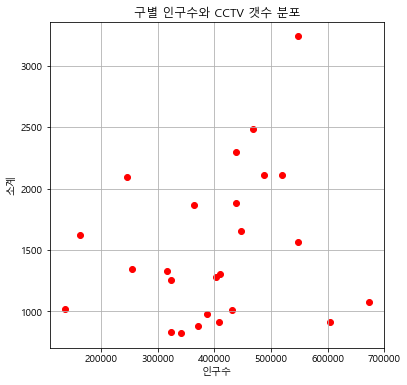

In [21]:
#(6,6) 사이즈의 '인구수'와 '소계'를 축으로 하는 scatter plot을 그리고 grid와 label도 달아 주세요!
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'],data_result['소계'],color='r', marker='o')
plt.xlabel('인구수')
plt.ylabel('소계')
plt.title('구별 인구수와 CCTV 갯수 분포')
plt.grid()

plt.show()

In [22]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([1.07336946e-03, 1.08384235e+03])

In [23]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)
f1(1)

1083.8434240952674

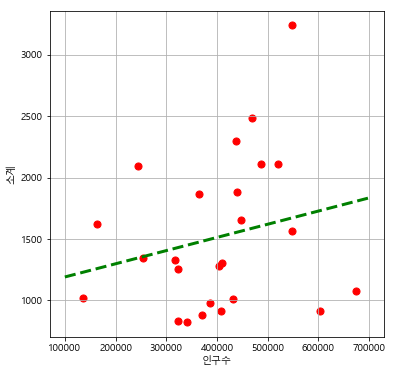

In [24]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50, color="r")
plt.plot(fx, f1(fx), ls='dashed', lw=3, color ='g')
plt.xlabel('인구수')
plt.ylabel('소계')
plt.grid()
plt.show()

### Quest

In [25]:
#1.
#데이터셋’ 폴더의 CCTV_in_Seoul.csv, population_in_Seoul.csv를 이용, 
#pandas / numpy를 통해 아래와 같은 형태로 데이터를 정리해 볼 것. 
#'외국인비율’ = ‘외국인’ / ‘인구수’ * 100, ‘고령자비율’ = ‘고령자’ / ‘인구수’ * 100
#‘오차’ – l소계 – 회귀직선(인구수)l , 오차는 np.abs를 활용


In [26]:
data_result['외국인비율'] = data_result['외국인']/data_result['인구수']*100
data_result['고령자비율'] = data_result['65세이상고령자']/data_result['인구수']*100

In [27]:
f1(data_result['인구수'])

array([1671.46168133, 1547.45208759, 1430.44944968, 1731.73996343,
       1642.03740434, 1482.13004241, 1554.49983146, 1356.50073415,
       1672.22055354, 1450.55795313, 1474.91163279, 1523.26370682,
       1498.54830165, 1430.62655564, 1554.15313312, 1423.52406993,
       1564.37590386, 1806.76419516, 1586.33489625, 1517.0542645 ,
       1346.91447151, 1607.28814147, 1258.8294802 , 1229.4266706 ,
       1521.93487543])

In [28]:
data_result['오차'] = np.abs(data_result['소계']-f1(data_result['인구수']))

In [29]:
data_result['오차']

구별
강남구     1566.538319
강동구      537.452088
강북구      599.449450
강서구      820.739963
관악구      466.962596
광진구      604.130042
구로구      329.500169
금천구        8.500734
노원구      106.220554
도봉구      625.557953
동대문구     395.088367
동작구      221.263707
마포구      518.548302
서대문구     176.626556
서초구      742.846867
성동구       96.524070
성북구       86.624096
송파구      725.764195
양천구      895.665104
영등포구     240.054265
용산구      749.085528
은평구      500.711859
종로구      360.170520
중구       206.426671
중랑구      605.934875
Name: 오차, dtype: float64

In [30]:
#2
#(1)에서 정리한 데이터를 ‘오차’ 컬럼을 기준으로 색깔을 입혀서 시각화 해보고
#이를 통해 무엇을 파악할 수 있는지 주석으로 간략하게 1-2줄로 서술해보기. (plt.colormap, plt.text 로 컬러맵과 이름 추가)


In [31]:
### Not sure how to use these

import matplotlib.colors as colors
import matplotlib.cm as cmx

In [32]:
data_result.head()

,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,자치구,인구수,한국인,외국인,65세이상고령자,외국인비율,고령자비율,오차
구별,,,,,,,,,,,,,,
강남구,3238,1292,430,584,932,150.619195,강남구,547453,542364,5089,67085,0.929578,12.254020,1566.538319
강동구,1010,379,99,155,377,166.490765,강동구,431920,427573,4347,58770,1.006436,13.606686,537.452088
강북구,831,369,120,138,204,125.203252,강북구,322915,319164,3751,58196,1.161606,18.022080,599.449450
강서구,911,388,258,184,81,134.793814,강서구,603611,596949,6662,79660,1.103691,13.197241,820.739963
관악구,2109,846,260,390,613,149.290780,관악구,520040,501957,18083,72249,3.477233,13.892970,466.962596


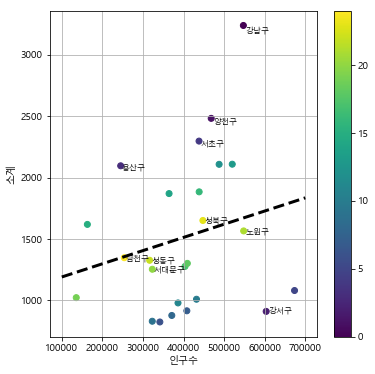

In [37]:
colormap = range(0,25)

### Save to seperate object
x = np.array(data_result.sort_values(by='오차', ascending=False)['인구수'])
y = np.array(data_result.sort_values(by='오차', ascending=False)['소계'])
z = np.array(data_result.sort_values(by='오차', ascending=False)['자치구'])

plt.figure(figsize=(6,6))
plt.scatter(x, y, c=colormap)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color ='black')
plt.xlabel('인구수')
plt.ylabel('소계')
plt.grid()

### Adding text labels
### 상위 5개, 하위 5개 Labeling
for i in range(5):
    plt.text(x[i]*1.01, y[i]*0.98, z[i], fontsize = 8)
for i in range(-5,0):
    plt.text(x[i]*1.01, y[i]*0.98, z[i], fontsize = 8)
    

plt.colorbar()
plt.show()